In [122]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt 
import geopandas as gpd

In [123]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world.to_crs(bodies_gdf.crs)
country_mask_world = ['Israel', 'Palestine', 'Jordan', 'Iraq', 'Syria', 'Turkey', 'Lebanon']
sub_world = world[world['name'].isin(country_mask_world)].copy()

In [124]:
data_dir = '/home/simon/Documents/Bodies/data/done_dfs/'

with open(f'{data_dir}bodies_df_2022_v1_2.pkl', 'rb') as file:
    bodies_df = pickle.load(file)

coords = gpd.GeoDataFrame(bodies_df[['longitude_full', 'latitude_full']], geometry=gpd.points_from_xy(bodies_df.longitude_full, bodies_df.latitude_full))
coords = coords.set_crs(sub_world.crs)
#coords = coords.to_crs(sub_world.crs)

# In Space:

In [125]:
bodies_df['coords'] = bodies_df['longitude_full'].astype("string") +'/'+ bodies_df['latitude_full'].astype("string")

In [126]:
unique_coords = bodies_df.groupby('coords').count() # the feature does not matter here
unique_coords = unique_coords['person_mean'].reset_index()
unique_coords.rename(columns={'person_mean' : 'images'}, inplace= True)

unique_coords['l_img'] = np.log(unique_coords['images'])# why?

unique_coords['longitude_full'] = unique_coords['coords'].str.split('/', expand = True).loc[:,0]
unique_coords['latitude_full'] = unique_coords['coords'].str.split('/', expand = True).loc[:,1]
unique_coords.drop('coords', axis=1, inplace=True)


coords = gpd.GeoDataFrame(unique_coords, geometry=gpd.points_from_xy(unique_coords.longitude_full, unique_coords.latitude_full))
coords = coords.set_crs(sub_world.crs)

In [127]:
unique_coords_fem = bodies_df[bodies_df['female_mean'] >= 1].groupby('coords').count()
unique_coords_fem = unique_coords_fem['person_mean'].reset_index() # the feature does not matter here
unique_coords_fem.rename(columns={'person_mean' : 'images'}, inplace= True)

unique_coords_fem['l_img'] = np.log(unique_coords_fem['images'])# why?

unique_coords_fem['longitude_full'] = unique_coords_fem['coords'].str.split('/', expand = True).loc[:,0]
unique_coords_fem['latitude_full'] = unique_coords_fem['coords'].str.split('/', expand = True).loc[:,1]
unique_coords_fem.drop('coords', axis=1, inplace=True)

coords_fem = gpd.GeoDataFrame(unique_coords_fem, geometry=gpd.points_from_xy(unique_coords_fem.longitude_full, unique_coords_fem.latitude_full))
coords_fem = coords_fem.set_crs(sub_world.crs)

In [128]:
unique_coords_gar = bodies_df[bodies_df['religiousGarmentFemale_mean'] >= 1].groupby('coords').count()
unique_coords_gar = unique_coords_gar['person_mean'].reset_index() # the feature does not matter here
unique_coords_gar.rename(columns={'person_mean' : 'images'}, inplace= True)

unique_coords_gar['l_img'] = np.log(unique_coords_gar['images']) # why?

unique_coords_gar['longitude_full'] = unique_coords_gar['coords'].str.split('/', expand = True).loc[:,0]
unique_coords_gar['latitude_full'] = unique_coords_gar['coords'].str.split('/', expand = True).loc[:,1]
unique_coords_gar.drop('coords', axis=1, inplace=True)

coords_gar = gpd.GeoDataFrame(unique_coords_gar, geometry=gpd.points_from_xy(unique_coords_gar.longitude_full, unique_coords_gar.latitude_full))
coords_gar = coords_gar.set_crs(sub_world.crs)

In [129]:
unique_coords_uni = bodies_df[bodies_df['uniformed_mean'] >= 1].groupby('coords').count()
unique_coords_uni = unique_coords_uni['person_mean'].reset_index() # the feature does not matter here
unique_coords_uni.rename(columns={'person_mean' : 'images'}, inplace= True)

unique_coords_uni['l_img'] = np.log(unique_coords_uni['images']) # why?

unique_coords_uni['longitude_full'] = unique_coords_uni['coords'].str.split('/', expand = True).loc[:,0]
unique_coords_uni['latitude_full'] = unique_coords_uni['coords'].str.split('/', expand = True).loc[:,1]
unique_coords_uni.drop('coords', axis=1, inplace=True)

coords_uni = gpd.GeoDataFrame(unique_coords_uni, geometry=gpd.points_from_xy(unique_coords_uni.longitude_full, unique_coords_uni.latitude_full))
coords_uni = coords_uni.set_crs(sub_world.crs)

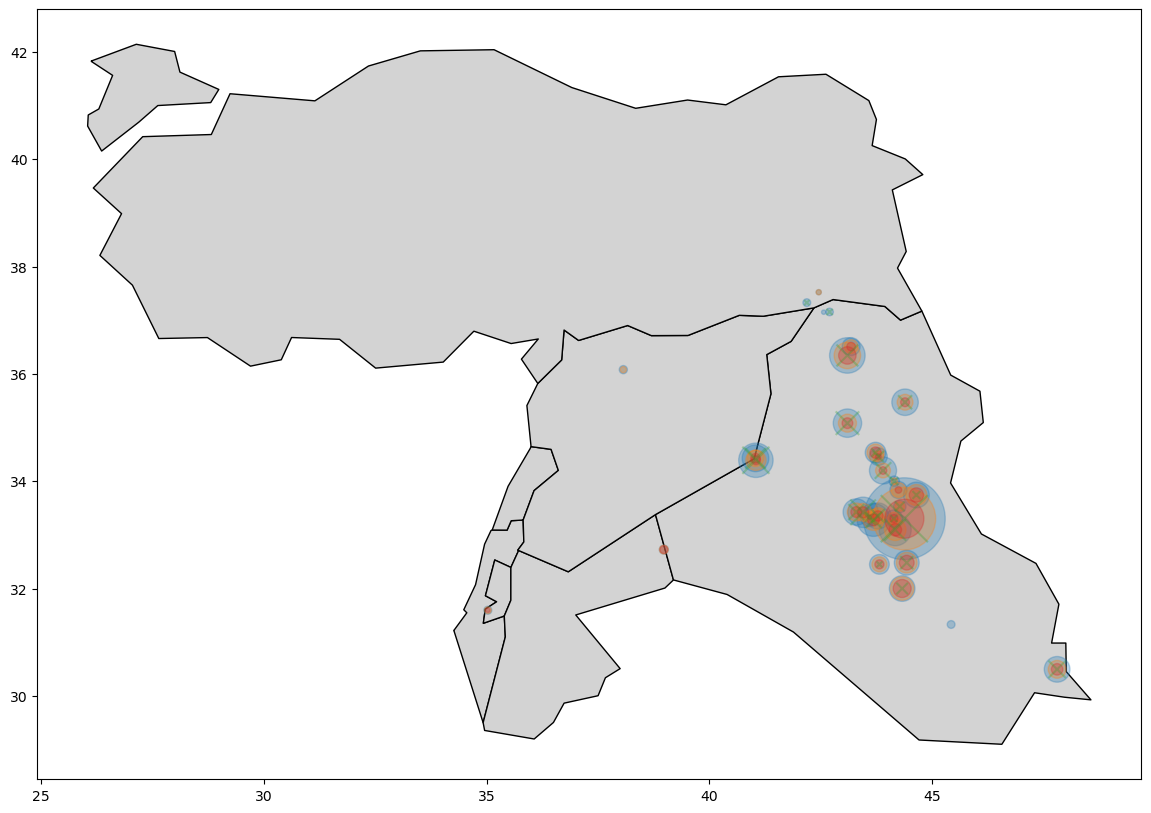

In [130]:
ax = sub_world.plot(edgecolors = 'black', color = 'lightgray', figsize=(15, 10))
coords.plot(ax=ax, color='C0', marker='o', markersize = np.sqrt(coords['images'])*10, alpha = 0.3)
coords_fem.plot(ax=ax, color='C1', marker='o', markersize = np.sqrt(coords_fem['images'])*10, alpha = 0.3)
coords_gar.plot(ax=ax, color='C3', marker='o', markersize = np.sqrt(coords_gar['images'])*10, alpha = 0.3)
coords_uni.plot(ax=ax, color='C2', marker='x', markersize = np.sqrt(coords_uni['images'])*10, alpha = 0.3)


plt.show()

In [131]:
coords.rename(columns = {'images' : 'img_all', 'l_img' : 'l_img_all'}, inplace = True)
coords_fem.rename(columns = {'images' : 'img_fem', 'l_img' : 'l_img_fem'}, inplace = True)
coords_gar.rename(columns = {'images' : 'img_gar', 'l_img' : 'l_img_gar'}, inplace = True)
coords_uni.rename(columns = {'images' : 'img_uni', 'l_img' : 'l_img_uni'}, inplace = True)


coord_merge = coords.merge(coords_fem, how = 'outer', on = ['longitude_full', 'latitude_full', 'geometry'])
coord_merge = coord_merge.merge(coords_gar, how = 'outer', on = ['longitude_full', 'latitude_full', 'geometry'])
coord_merge = coord_merge.merge(coords_uni, how = 'outer', on = ['longitude_full', 'latitude_full', 'geometry'])

coord_merge.fillna(0, inplace = True)

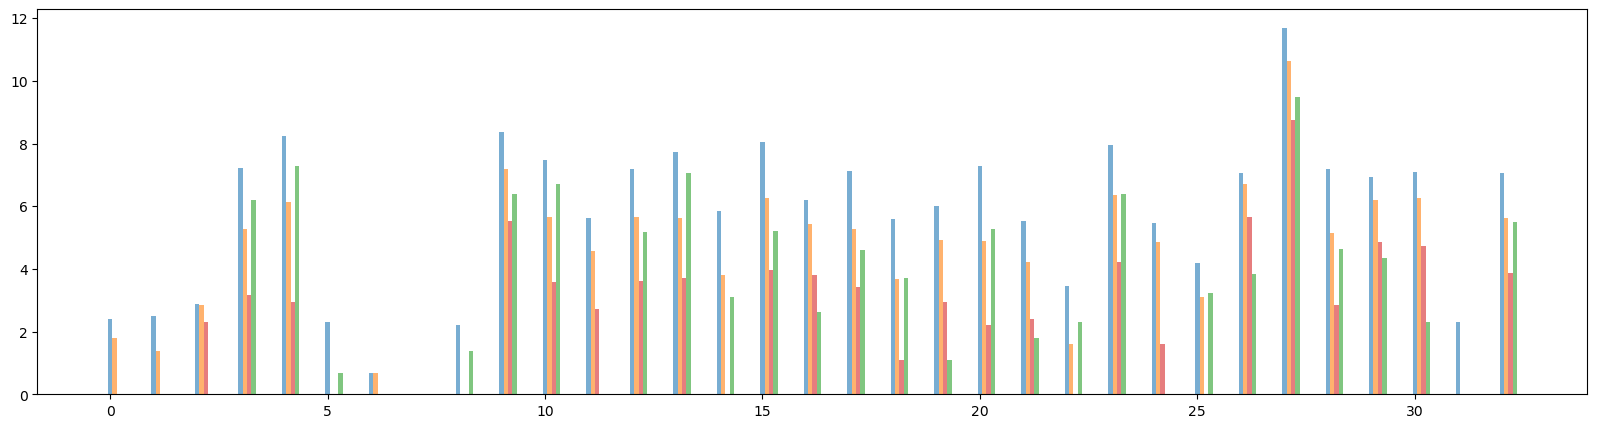

In [132]:
plt.figure(figsize=[20,5])

plt.bar(np.array(list(coord_merge.index)), coord_merge['l_img_all'], color ='C0', width = 0.1, alpha = 0.6)
plt.bar(np.array(list(coord_merge.index))+.1, coord_merge['l_img_fem'], color ='C1', width = 0.1, alpha = 0.6)
plt.bar(np.array(list(coord_merge.index))+.2, coord_merge['l_img_gar'], color ='C3', width = 0.1, alpha = 0.6)
plt.bar(np.array(list(coord_merge.index))+.3, coord_merge['l_img_uni'], color ='C2', width = 0.1, alpha = 0.6)

plt.show()

tjek if this the places with no women are bases. ANd what about the one with same amount of women an persons?

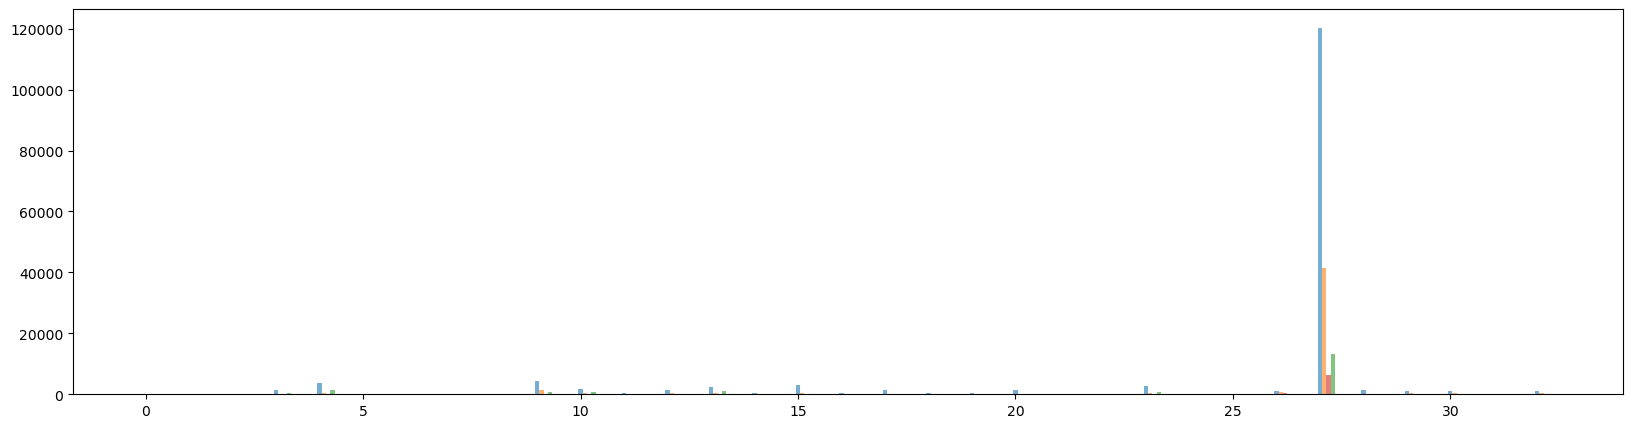

In [133]:
plt.figure(figsize=[20,5])

plt.bar(np.array(list(coord_merge.index)), coord_merge['img_all'], color ='C0', width = 0.1, alpha = 0.6)
plt.bar(np.array(list(coord_merge.index))+.1, coord_merge['img_fem'], color ='C1', width = 0.1, alpha = 0.6)
plt.bar(np.array(list(coord_merge.index))+.2, coord_merge['img_gar'], color ='C3', width = 0.1, alpha = 0.6)
plt.bar(np.array(list(coord_merge.index))+.3, coord_merge['img_uni'], color ='C2', width = 0.1, alpha = 0.6)

plt.show()

# In time

In [148]:
unique_months = bodies_df.groupby('month_id').count() # the feature does not matter here
unique_months = unique_months['person_mean'].reset_index()
unique_months.rename(columns={'person_mean' : 'images'}, inplace= True)

unique_months_fem = bodies_df[bodies_df['female_mean'] >= 1].groupby('month_id').count() # the feature does not matter here
unique_months_fem = unique_months_fem['person_mean'].reset_index()
unique_months_fem.rename(columns={'person_mean' : 'images'}, inplace= True)

unique_months_gar = bodies_df[bodies_df['religiousGarmentFemale_mean'] >= 1].groupby('month_id').count() # the feature does not matter here
unique_months_gar = unique_months_gar['person_mean'].reset_index()
unique_months_gar.rename(columns={'person_mean' : 'images'}, inplace= True)


unique_months_uni = bodies_df[bodies_df['uniformed_mean'] >= 1].groupby('month_id').count() # the feature does not matter here
unique_months_uni = unique_months_uni['person_mean'].reset_index()
unique_months_uni.rename(columns={'person_mean' : 'images'}, inplace= True)

#unique_months['l_img'] = np.log(unique_months['images'])# why?

#unique_months['longitude_full'] = unique_months['coords'].str.split('/', expand = True).loc[:,0]
#unique_months['latitude_full'] = unique_months['coords'].str.split('/', expand = True).loc[:,1]
#unique_months.drop('coords', axis=1, inplace=True)


#months = gpd.GeoDataFrame(unique_months, geometry=gpd.points_from_xy(unique_months.longitude_full, unique_months.latitude_full))
#months = coords.set_crs(sub_world.crs)

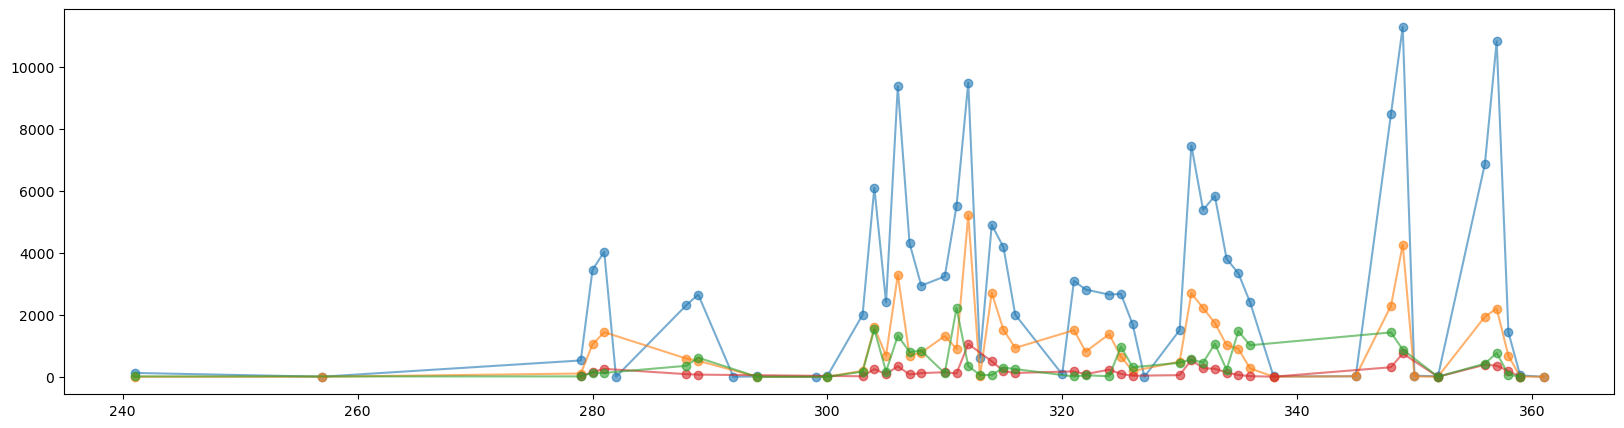

In [155]:
plt.figure(figsize=[20,5])

plt.plot(unique_months['month_id'], unique_months['images'], '-o', color = 'C0', alpha = 0.6)
plt.plot(unique_months_fem['month_id'], unique_months_fem['images'], '-o', color = 'C1', alpha = 0.6)
plt.plot(unique_months_gar['month_id'], unique_months_gar['images'], '-o', color = 'C3', alpha = 0.6)
plt.plot(unique_months_uni['month_id'], unique_months_uni['images'], '-o', color = 'C2', alpha = 0.6)

plt.show()

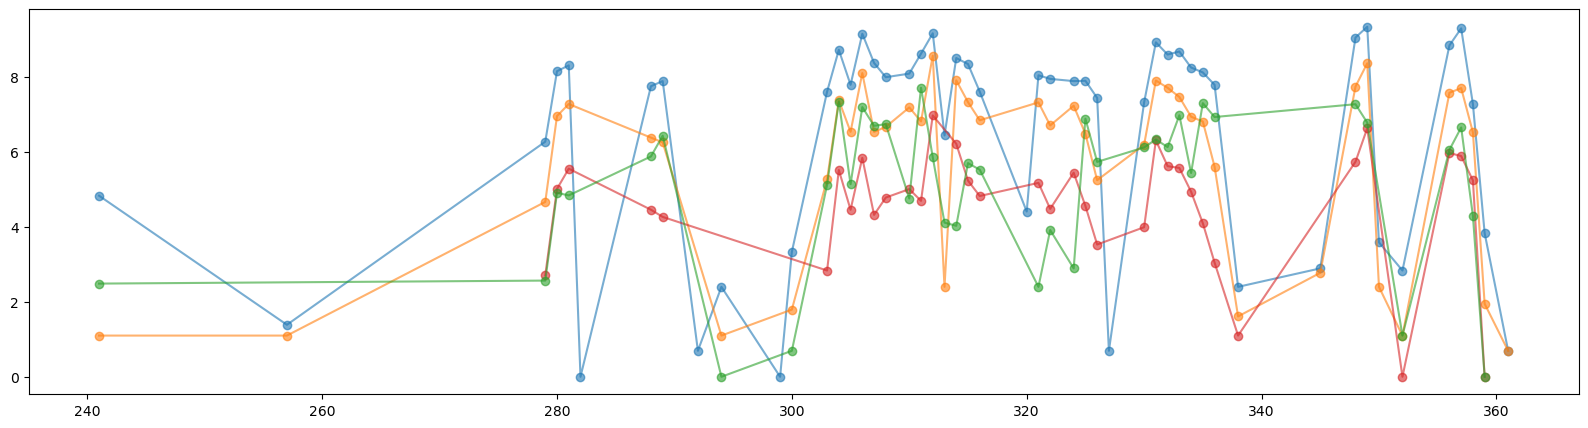

In [156]:
plt.figure(figsize=[20,5])

plt.plot(unique_months['month_id'], np.log(unique_months['images']), '-o', color = 'C0', alpha = 0.6)
plt.plot(unique_months_fem['month_id'], np.log(unique_months_fem['images']), '-o', color = 'C1', alpha = 0.6)
plt.plot(unique_months_gar['month_id'], np.log(unique_months_gar['images']), '-o', color = 'C3', alpha = 0.6)
plt.plot(unique_months_uni['month_id'], np.log(unique_months_uni['images']), '-o', color = 'C2', alpha = 0.6)

plt.show()

In [ ]:
cshapes_mask = ['Gaza', 'West Bank', 'Jordan', 'Palestine', 'Israel', 'Iraq', 'Syria', 'Lebanon', 'Turkey (Ottoman Empire)']
gwno_to_keep = cshapes.loc[cshapes['cntry_name'].isin(cshapes_mask), 'gwcode'].unique()
gid_geom_df = combined_df.loc[(combined_df['gwno'].isin(gwno_to_keep)), ['gid', 'geometry']].drop_duplicates().copy()

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs(bodies_gdf.crs)
country_mask_world = ['Israel', 'Palestine', 'Jordan', 'Iraq', 'Syria', 'Turkey', 'Lebanon']
sub_world = world[world['name'].isin(country_mask_world)].copy()